"The goal of the learning algorithm is now to fit the distributibution p(y|x) to all those different y values that are compatible with x. To derive the same linear regression algorithm we obtained before, we define p(y|x) = N(y,y_hat(x,w),variance).
The function y_hat(x,w) gives a prediction of the mean of the gaussian. In this example, the variance is fixed to some constant defined by the user." Deep Learning by Ian Goodfellow

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
from scipy.optimize import minimize

In [11]:
X = 100 * np.random.rand(100,1)  # 100 examples(m), 1 feature(n)
y = 2 * X[:,0]  + 2*np.random.randn(100)
X = np.c_[X, np.ones(len(X))]  # incluindo o paramentro bias (b) para ser aprendido

In [18]:
X.shape

(100, 2)

In [30]:
m = len(X)
sigma_2 = 1  # variance (std**2) 
w0 = np.ones(2) #initial guess

def neg_log_likelihood(w0):
    w = w0.T
    y_hat = X @ w
    # log_likelihood = -m * np.log(np.sqrt(sigma_2)) - m/2 * np.log(2*scipy.constants.pi) - sum(np.abs(y_hat - y)**2/(2*sigma_2))
    return sum(np.abs(y_hat - y)**2/(2*sigma_2))
    

w = minimize(neg_log_likelihood,w0,method='BFGS')
y_hat = X @ w.x

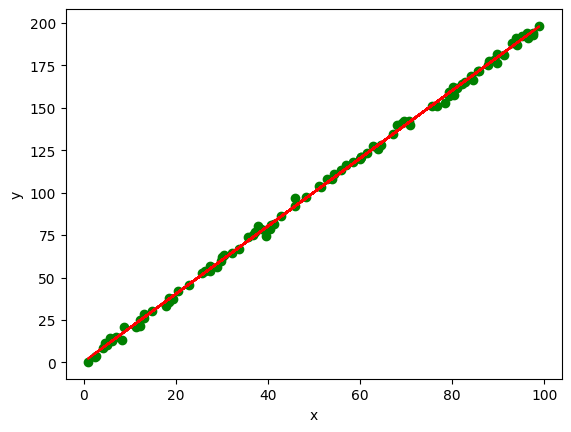

In [32]:
plt.scatter(X[:,0],y,color='green')
plt.plot(X[:,0],y_hat,color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()